## Face & Eye Detection using HAAR Cascade Classifiers

In [4]:
!pip uninstall opencv-python opencv-contrib-python -y
!pip install opencv-python

Found existing installation: opencv-python 4.7.0.72
Uninstalling opencv-python-4.7.0.72:
  Successfully uninstalled opencv-python-4.7.0.72


ERROR: Exception:
Traceback (most recent call last):
  File "C:\Users\mikec\anaconda3\lib\site-packages\pip\_internal\cli\base_command.py", line 167, in exc_logging_wrapper
    status = run_func(*args)
  File "C:\Users\mikec\anaconda3\lib\site-packages\pip\_internal\commands\uninstall.py", line 103, in run
    uninstall_pathset.commit()
  File "C:\Users\mikec\anaconda3\lib\site-packages\pip\_internal\req\req_uninstall.py", line 424, in commit
    self._moved_paths.commit()
  File "C:\Users\mikec\anaconda3\lib\site-packages\pip\_internal\req\req_uninstall.py", line 277, in commit
    save_dir.cleanup()
  File "C:\Users\mikec\anaconda3\lib\site-packages\pip\_internal\utils\temp_dir.py", line 173, in cleanup
    rmtree(self._path)
  File "C:\Users\mikec\anaconda3\lib\site-packages\pip\_vendor\tenacity\__init__.py", line 326, in wrapped_f
    return self(f, *args, **kw)
  File "C:\Users\mikec\anaconda3\lib\site-packages\pip\_vendor\tenacity\__init__.py", line 406, in __call__
    do = self

  Using cached opencv_python-4.7.0.72-cp37-abi3-win_amd64.whl (38.2 MB)


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
animated-drawings 0.0.0 requires numpy==1.23.3, but you have numpy 1.21.6 which is incompatible.
animated-drawings 0.0.0 requires opencv-python==4.6.0.66, but you have opencv-python 4.7.0.72 which is incompatible.
animated-drawings 0.0.0 requires Pillow==9.3.0, but you have pillow 9.5.0 which is incompatible.
animated-drawings 0.0.0 requires scikit-image==0.19.3, but you have scikit-image 0.21.0 which is incompatible.
animated-drawings 0.0.0 requires scikit-learn==1.1.2, but you have scikit-learn 1.1.3 which is incompatible.


In [5]:
import numpy as np
import cv2

# We point OpenCV's CascadeClassifier function to where our 
# classifier (XML file format) is stored
face_classifier = cv2.CascadeClassifier('cascade_files/haarcascade_frontalface_default.xml')
face_classifier

< cv2.CascadeClassifier 000001C5D5546B30>

In [6]:
# Load our image then convert it to grayscale
image = cv2.imread('./images/Modi.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Our classifier returns the ROI of the detected face as a tuple
# It stores the top left coordinate and the bottom right coordiantes
faces = face_classifier.detectMultiScale(gray, 1.3, 5)

# When no faces detected, face_classifier returns and empty tuple
if faces is ():
    print("No faces found")

# We iterate through our faces array and draw a rectangle
# over each face in faces
for (x,y,w,h) in faces:
    cv2.rectangle(image, (x,y), (x+w,y+h), (127,0,255), 2)
    cv2.imshow('Face Detection', image)
    cv2.waitKey(0)
    
cv2.destroyAllWindows()

<>:10: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:10: SyntaxWarning: "is" with a literal. Did you mean "=="?
C:\WINDOWS\Temp\ipykernel_6716\3193849634.py:10: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if faces is ():


### Let's combine face and eye detection

In [7]:
import numpy as np
import cv2
 
face_classifier = cv2.CascadeClassifier('cascade_files/haarcascade_frontalface_default.xml')
eye_classifier = cv2.CascadeClassifier('cascade_files/haarcascade_eye.xml')
 
img = cv2.imread('images/Modi.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

faces = face_classifier.detectMultiScale(gray, 1.3, 5)

# When no faces detected, face_classifier returns and empty tuple
if faces is ():
    print("No Face Found")

for (x,y,w,h) in faces:
    cv2.rectangle(img,(x,y),(x+w,y+h),(127,0,255),2)
#     cv2.imshow('img',img)
#     cv2.waitKey(0)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyes = eye_classifier.detectMultiScale(roi_gray)
#     print(eyes)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(255,255,0),2)
    
cv2.imshow('img',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

<>:13: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:13: SyntaxWarning: "is" with a literal. Did you mean "=="?
C:\WINDOWS\Temp\ipykernel_6716\3776168911.py:13: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if faces is ():


### improved version

In [8]:
import numpy as np
import cv2
 
face_classifier = cv2.CascadeClassifier('cascade_files/haarcascade_frontalface_default.xml')
eye_classifier = cv2.CascadeClassifier('cascade_files/haarcascade_eye.xml')
 
img = cv2.imread('images/Modi.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

faces = face_classifier.detectMultiScale(gray, 1.12, 5)
# faces = face_classifier.detectMultiScale(gray, 1.3, 5)

# When no faces detected, face_classifier returns and empty tuple
if faces is ():
    print("No Face Found")

for (x,y,w,h) in faces:
    cv2.rectangle(img,(x,y),(x+w,y+h),(127,0,255),2)
#     cv2.imshow('img',img)
#     cv2.waitKey(0)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    #eyes = eye_classifier.detectMultiScale(roi_gray)
    eyes = eye_classifier.detectMultiScale(roi_gray, minSize=(30,30), maxSize=(130,130))
#     print(eyes)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(255,255,0),2)
    
cv2.imshow('img',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

<>:14: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:14: SyntaxWarning: "is" with a literal. Did you mean "=="?
C:\WINDOWS\Temp\ipykernel_6716\1446419396.py:14: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if faces is ():


### test another picture
https://towardsdatascience.com/object-detection-with-haar-cascades-in-python-ad9e70ed50aa

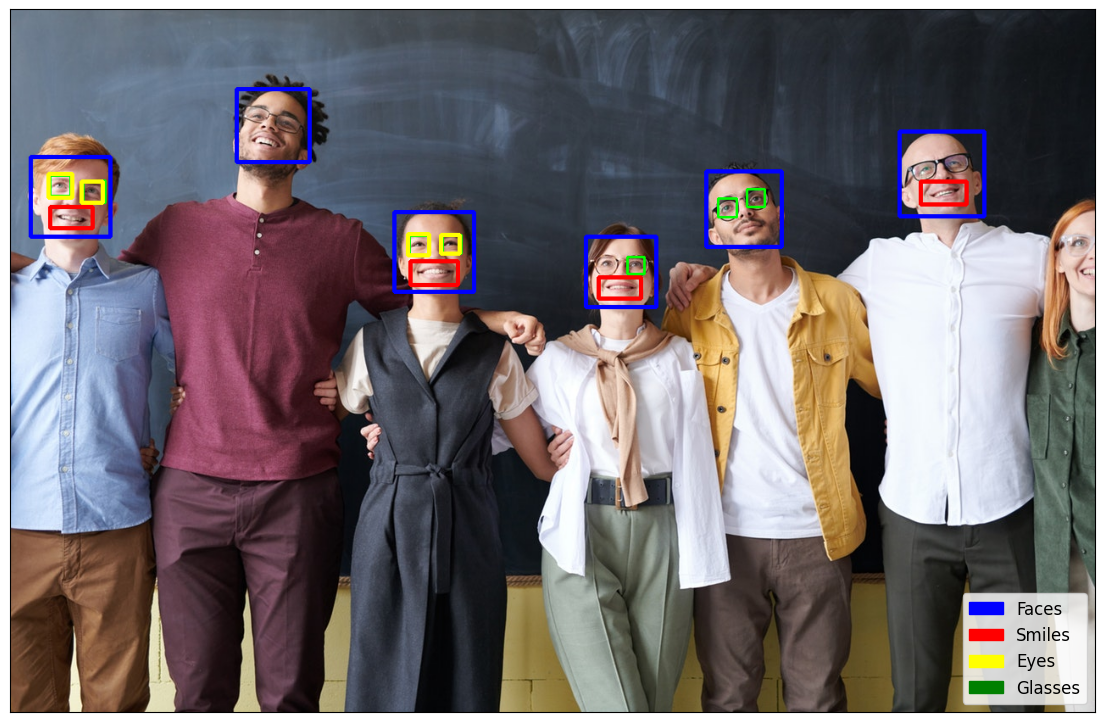

In [9]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
 
plt.figure(figsize=(14,10))

face_cascade = cv2.CascadeClassifier('cascade_files/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('cascade_files/haarcascade_eye.xml')
glasses_cascade = cv2.CascadeClassifier('cascade_files/haarcascade_eye_tree_eyeglasses.xml')
smile_cascade = cv2.CascadeClassifier('cascade_files/haarcascade_smile.xml')
 
img = cv2.imread('images/good.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
for(x, y, w, h) in faces:
    img = cv2.rectangle(img, (x,y), (x+w,y+h), (255,0,0), 3)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]

    smiles = smile_cascade.detectMultiScale(roi_gray, minNeighbors=20)
    for(sx, sy, sw, sh) in smiles:
        cv2.rectangle(roi_color, (sx,sy), (sx+sw,sy+sh), (0,0,255), 3)
    
    glasses = glasses_cascade.detectMultiScale(roi_gray, scaleFactor=1.04, minNeighbors=1)
    for(gx, gy, gw, gh) in glasses:
        cv2.rectangle(roi_color, (gx,gy), (gx+gw,gy+gh), (0,255,0), 2)
        
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for(ex, ey, ew, eh) in eyes:
        cv2.rectangle(roi_color, (ex,ey), (ex+ew,ey+eh), (0,255,255), 3)
    
plt.xticks([])
plt.yticks([])

face_patch = mpatches.Patch(color='blue', label='Faces')
smile_patch = mpatches.Patch(color='red', label='Smiles')
eye_patch = mpatches.Patch(color='yellow', label='Eyes')
glass_patch = mpatches.Patch(color='green', label='Glasses')

plt.legend(handles=[face_patch, smile_patch, eye_patch, glass_patch], 
           loc='lower right', fontsize=12)

imgplot = plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))



### 視訊

In [11]:
face_classifier = cv2.CascadeClassifier('cascade_files/haarcascade_frontalface_default.xml')
eye_classifier = cv2.CascadeClassifier('cascade_files/haarcascade_eye.xml')

def face_detector(img, size=0.5):
    # Convert image to grayscale
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces = face_classifier.detectMultiScale(gray, 1.3, 5)
    if faces is ():
        return img
    
    for (x,y,w,h) in faces:
        x = x - 50
        w = w + 50
        y = y - 50
        h = h + 50
        cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_classifier.detectMultiScale(roi_gray)
        
        for (ex,ey,ew,eh) in eyes:
            cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,0,255),2) 
            
    roi_color = cv2.flip(roi_color,1)
    return roi_color

cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    cv2.imshow('Our Face Extractor', face_detector(frame))
    if cv2.waitKey(1) == 13: #13 is the Enter Key
        break
        
cap.release()
cv2.destroyAllWindows()      

<>:8: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:8: SyntaxWarning: "is" with a literal. Did you mean "=="?
C:\WINDOWS\Temp\ipykernel_6716\1369445947.py:8: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if faces is ():
C:\WINDOWS\Temp\ipykernel_6716\1369445947.py:8: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if faces is ():
C:\WINDOWS\Temp\ipykernel_6716\1369445947.py:8: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if faces is ():


error: OpenCV(4.7.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


### Tuning Cascade Classifiers

*ourClassifier*.**detectMultiScale**(input image, **Scale Factor** , **Min Neighbors**)

- **Scale Factor**
Specifies how much we reduce the image size each time we scale. E.g. in face detection we typically use 1.3. This means we reduce the image by 30% each time it’s scaled. Smaller values, like 1.05 will take longer to compute, but will increase the rate of detection.



- **Min Neighbors**
Specifies the number of neighbors each potential window should have in order to consider it a positive detection. Typically set between 3-6. 
It acts as sensitivity setting, low values will sometimes detect multiples faces over a single face. High values will ensure less false positives, but you may miss some faces.  
